## 01 - Importes

In [1]:
!pip install -q aeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 55.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

import torch
from torch import nn
import torch.optim as optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader


import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

from aeon.datasets import load_arrow_head, load_basic_motions


from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 02 - Data

In [4]:
X_train = pd.read_csv('/content/ECG200_TRAIN.tsv', delimiter='\t', header=None)

In [5]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,...,1.002770,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546
96,-1,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,...,-0.136610,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463
97,-1,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,...,0.482452,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293
98,1,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,...,0.324323,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709


In [6]:
# X_train = pd.read_csv('/content/Adiac_TRAIN.tsv', delimiter='\t', header=None)
y_train = X_train[0].to_numpy() - 1

X_train = X_train.drop(columns=[0])
X_train = X_train.to_numpy()


In [7]:
X_test = pd.read_csv('/content/ECG200_TEST.tsv', delimiter='\t', header=None)
y_test = X_test[0].to_numpy() - 1

X_test = X_test.drop(columns=[0])
X_test = X_test.to_numpy()


In [8]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean)/(X_train_std)
X_test = (X_test - X_train_mean)/(X_train_std)

In [9]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                test_size=0.5,
                                                stratify = y_test,
                                                random_state=42)

In [11]:
y_test.shape, y_val.shape

((50,), (50,))

In [12]:
num_classes = np.unique(y_train).shape[0]  # Número de classes

In [13]:
y_train.shape, y_val.shape, y_test.shape

((100,), (50,), (50,))

In [14]:
y_train = np.where(y_train == -2, 1, 0)
y_val = np.where(y_val == -2, 1, 0)
y_test = np.where(y_test == -2, 1, 0)

In [15]:
# Criando uma classe personalizada de Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels):
        """
        Args:
            data: np.ndarray ou tensor com shape (n_cases, n_channels, n_timepoints)
            labels: np.ndarray ou tensor com os rótulos correspondentes
        """
        self.data = torch.tensor(data, dtype=torch.float32)  # Convertendo para tensor
        self.labels = torch.tensor(labels, dtype=torch.long)  # Labels como inteiros

        # num_classes = np.unique(labels).shape[0]  # Número de classes únicas
        # self.labels = F.one_hot(self.labels, num_classes=num_classes)

    def __len__(self):
        # Retorna o número total de amostras
        return len(self.data)

    def __getitem__(self, idx):
        # Retorna um único par (amostra, label) dado um índice
        return self.data[idx], self.labels[idx]




In [16]:
batch_size = 16

dataset_train = TimeSeriesDataset(X_train, y_train)
dataset_val = TimeSeriesDataset(X_val, y_val)
dataset_test = TimeSeriesDataset(X_test, y_test)

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

# Criando o dataset

# Iterando sobre o DataLoader
# for batch_data, batch_labels in dataloader_train:
#     print("Batch data shape:", batch_data.shape)
#     print("Batch labels shape:", batch_labels.shape)

## 03 - Modelo

In [17]:
class mlp(nn.Module):

    def __init__(self, input_size, n_classes):
        super().__init__()


        self.fully_connected = nn.Sequential(
        nn.Dropout(0.1),
        nn.Linear(input_size,500),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(500,500),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(500,500),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(500, n_classes),
        nn.Dropout(0.3),

        )

        self.initialize_weights()

    def forward(self, x):

        x = self.fully_connected(x)
        return x


    def initialize_weights(self):
        for layer in self.fully_connected:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight)
                nn.init.zeros_(layer.bias)


In [18]:
input_size =X_train.shape[2] # tamanho de uma série
n_classes = len(np.unique(y_train))

print(f'Input size: {input_size}, n_classes: {n_classes}')

Input size: 96, n_classes: 2


In [19]:
# Configurações gerais
input_dim = input_size  # Dimensão de entrada
output_dim = n_classes
num_epochs = 100
learning_rate = 0.01
seeds = [i for i in range(100)]  # Lista de sementes a serem testadas

In [20]:
# seeds

In [21]:
def train_one_epoch(model, dataloader, optimizer, loss_fn, device):
    model.train()  # Modo de treino
    running_loss = 0.0
    correct_predictions = 0


    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Ajuste condicional para dimensões (se necessário)
        if outputs.dim() > 2 and outputs.size(1) == 1:
            outputs = outputs.squeeze(1)

        loss = loss_fn(outputs, labels)

        # Calcular acurácia
        preds = torch.argmax(outputs, dim=1)
        correct_predictions += (preds == labels).sum().item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)

    return avg_loss, accuracy

In [22]:
# Função de avaliação
def evaluate(model, dataloader, loss_fn, device):
    model.eval()  # Modo de avaliação
    running_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            # Ajuste condicional para dimensões
            if outputs.dim() > 2 and outputs.size(1) == 1:
                outputs = outputs.squeeze(1)

            loss = loss_fn(outputs, labels)
            running_loss += loss.item()

            # Calcular acurácia
            preds = torch.argmax(outputs, dim=1)
            correct_predictions += (preds == labels).sum().item()

    avg_loss = running_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)
    return avg_loss, accuracy

In [23]:
def train_model(seed):
    torch.manual_seed(seed)

    model = mlp(input_size=input_size, n_classes = n_classes)
    model = model.to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adadelta(model.parameters(), lr=0.1, rho=0.95, eps=1e-8)
    train_losses, val_losses, val_accuracies = [], [], []

    print(f'Teste da Seed: {seed}')
    best_model = model
    best_val_acc = 0

    train_metrics_list = []
    val_metrics_list = []
    for epoch in range(num_epochs):
        # Treinamento
        train_loss, train_acc = train_one_epoch(model, dataloader_train, optimizer, loss_fn, device)

        train_metrics_list.append((train_loss, train_acc))



        train_losses.append(train_loss)

        # Avaliação
        val_loss, val_acc = evaluate(model, dataloader_val, loss_fn, device)
        val_metrics_list.append((val_loss, val_acc))



        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model

        if (epoch + 1) == 50:
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"  Train Loss: {train_loss:.4f}")
            print(f"  Validation Loss: {val_loss:.4f}")
            print(f"  Validation Accuracy: {val_acc:.4f}")

    test_loss, test_acc = evaluate(best_model, dataloader_test, loss_fn, device)

    return train_metrics_list, val_metrics_list, test_acc

In [24]:
# Testando diferentes sementes
results = {}
acc_list_total =np.zeros(100)
val_list_total = np.zeros(100)

for seed in seeds:
    train_metrics_list, val_metrics_list, test_acc = train_model(seed)
    train_acc_1, val_acc_1 = train_metrics_list[0][1], val_metrics_list[0][1]

    acc_list = np.array([train_metrics_list[i][1] for i in range(len(train_metrics_list))])
    acc_list_total = (1/2)*(acc_list_total + acc_list)

    val_list = np.array([val_metrics_list[i][1] for i in range(len(val_metrics_list))])
    val_list_total = (1/2)*(val_list_total + val_list)

    results[seed] = train_acc_1, val_acc_1, test_acc
    print(f"Semente: {seed}, train_acc_1: {train_acc_1:.4f}, val_acc_1: {val_acc_1:.4f}, test_acc {test_acc:.4f}")

Teste da Seed: 0
Epoch 50/100
  Train Loss: 0.3901
  Validation Loss: 0.5646
  Validation Accuracy: 0.8600
Semente: 0, train_acc_1: 0.6600, val_acc_1: 0.6400, test_acc 0.8400
Teste da Seed: 1
Epoch 50/100
  Train Loss: 0.4998
  Validation Loss: 0.6715
  Validation Accuracy: 0.8600
Semente: 1, train_acc_1: 0.5400, val_acc_1: 0.7400, test_acc 0.8400
Teste da Seed: 2
Epoch 50/100
  Train Loss: 0.5156
  Validation Loss: 0.3459
  Validation Accuracy: 0.8600
Semente: 2, train_acc_1: 0.6400, val_acc_1: 0.7200, test_acc 0.8400
Teste da Seed: 3
Epoch 50/100
  Train Loss: 0.3807
  Validation Loss: 0.6487
  Validation Accuracy: 0.8600
Semente: 3, train_acc_1: 0.6900, val_acc_1: 0.7600, test_acc 0.8000
Teste da Seed: 4
Epoch 50/100
  Train Loss: 0.4270
  Validation Loss: 0.3269
  Validation Accuracy: 0.8400
Semente: 4, train_acc_1: 0.6300, val_acc_1: 0.7800, test_acc 0.8800
Teste da Seed: 5
Epoch 50/100
  Train Loss: 0.4211
  Validation Loss: 0.3229
  Validation Accuracy: 0.8200
Semente: 5, train_

In [25]:
# results.items()

In [26]:
# results

In [27]:
# Resultados finais
print("\nResultados por semente:")
train_acc_1_list = []
val_acc_1_list = []
test_acc_list = []
for seed, accs in results.items():
    print(f"Semente: {seed}, train_acc_1: {accs[0]:.4}, val_acc_1: {accs[1]:.4}, test_acc {accs[2]:.4}")
    train_acc_1_list.append(accs[0])
    val_acc_1_list.append(accs[1])
    test_acc_list.append(accs[2])


Resultados por semente:
Semente: 0, train_acc_1: 0.66, val_acc_1: 0.64, test_acc 0.84
Semente: 1, train_acc_1: 0.54, val_acc_1: 0.74, test_acc 0.84
Semente: 2, train_acc_1: 0.64, val_acc_1: 0.72, test_acc 0.84
Semente: 3, train_acc_1: 0.69, val_acc_1: 0.76, test_acc 0.8
Semente: 4, train_acc_1: 0.63, val_acc_1: 0.78, test_acc 0.88
Semente: 5, train_acc_1: 0.72, val_acc_1: 0.68, test_acc 0.84
Semente: 6, train_acc_1: 0.39, val_acc_1: 0.3, test_acc 0.84
Semente: 7, train_acc_1: 0.61, val_acc_1: 0.64, test_acc 0.84
Semente: 8, train_acc_1: 0.5, val_acc_1: 0.72, test_acc 0.8
Semente: 9, train_acc_1: 0.41, val_acc_1: 0.2, test_acc 0.8
Semente: 10, train_acc_1: 0.68, val_acc_1: 0.7, test_acc 0.86
Semente: 11, train_acc_1: 0.59, val_acc_1: 0.66, test_acc 0.88
Semente: 12, train_acc_1: 0.57, val_acc_1: 0.64, test_acc 0.82
Semente: 13, train_acc_1: 0.64, val_acc_1: 0.66, test_acc 0.86
Semente: 14, train_acc_1: 0.58, val_acc_1: 0.78, test_acc 0.84
Semente: 15, train_acc_1: 0.59, val_acc_1: 0.76

In [28]:
train_acc_1_mean, val_acc_1_mean, test_acc_mean = np.mean(train_acc_1_list), np.mean(val_acc_1_list), np.mean(test_acc_list)
train_acc_1_std, val_acc_1_std, test_acc_std = np.std(train_acc_1_list), np.std(val_acc_1_list), np.std(test_acc_list)

In [29]:
print(f"Média de train_acc_1: {train_acc_1_mean:.4f}, Desvio padrão: {train_acc_1_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_mean:.4f}, Desvio padrão: {val_acc_1_std:.4f}")
print(f"Média de test_acc: {test_acc_mean:.4f}, Desvio padrão: {test_acc_std:.4f}")

Média de train_acc_1: 0.5496, Desvio padrão: 0.0917
Média de val_acc_1: 0.6154, Desvio padrão: 0.1410
Média de test_acc: 0.8402, Desvio padrão: 0.0279


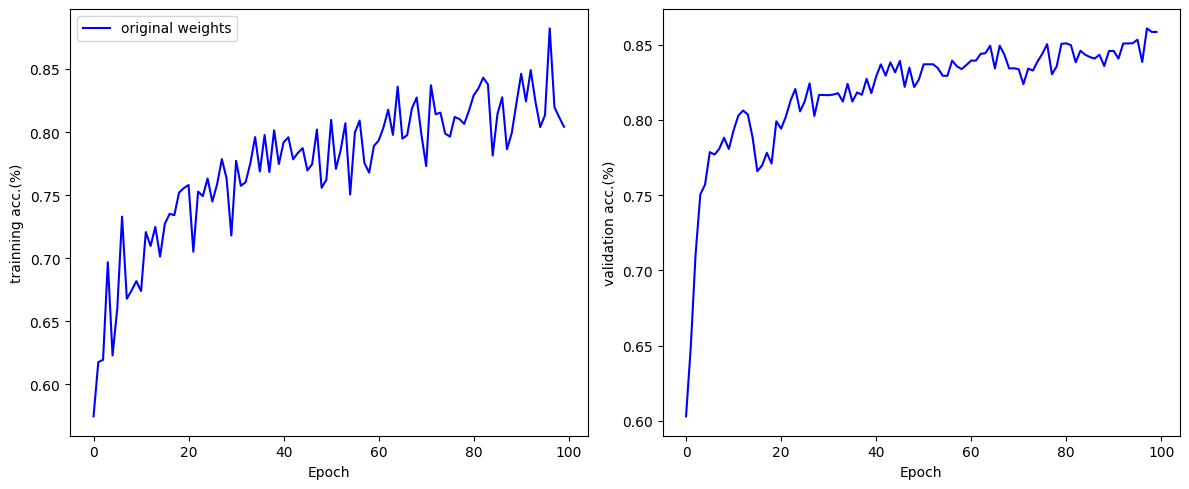

In [30]:
plt.figure(figsize=(12, 5))

# Primeiro gráfico: Acurácia de treino
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
plt.plot(acc_list_total, label='original weights', color='blue')
#, linestyle='dashed'
plt.xlabel("Epoch")
plt.ylabel("trainning acc.(%)")
plt.legend()

# Segundo gráfico: Acurácia de validação
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
plt.plot(val_list_total, label='Validation Accuracy', color='blue')
plt.xlabel("Epoch")
plt.ylabel("validation acc.(%)")
# plt.legend()

# Mostrar os gráficos
plt.tight_layout()  # Ajusta o layout automaticamente
plt.show()


In [31]:
# # 1 = sentimento positivo ou 0 = sentimento negativo

# model = mlp(input_size=input_size, n_classes = n_classes)
# model = model.to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.Adadelta(model.parameters(), lr=0.1, rho=0.95, eps=1e-8)

## PA rewiring method

- @author: scabini

In [32]:
def rewiring_np(weights, seed):
    dimensions = weights.shape
    if seed:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng()
    st = np.zeros(dimensions[1])
    for neuron in range(1,dimensions[0]): #loops over output neurons from 2 to n-1
        st = st + weights[neuron-1]   #compute the temporary strength
        P = st + np.abs(np.min(st)) + 1 #make the distribution positive and avoid null probability
        P = P / np.sum(P) #pdf from negative to positive
        targets = rng.choice(a=[i for i in range(dimensions[1])], replace=False,
                                      size=dimensions[1],p=P)
        edges_to_rewire = np.argsort(weights[neuron]) #sort the edges to be rewired
        weights[neuron, targets] = weights[neuron, edges_to_rewire] #rewiring
    return weights

In [33]:
def rewiring_torch(weights, seed):
    if seed:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng()
    st = torch.zeros(weights.size(1))
    with torch.no_grad():
        dimensions = weights.shape
        for neuron in range(1,dimensions[0]):
            st = st + weights[neuron-1]
            P = st + torch.abs(torch.min(st)) + 1 #the +1 is to ensure no zero values
            P = P / torch.sum(P)
            targets = rng.choice(a=[i for i in range(dimensions[1])], replace=False,
                                          size=dimensions[1],p=P.cpu().detach().numpy())
            edges_to_rewire = torch.argsort(weights[neuron])
            weights[neuron, targets] = weights[neuron, edges_to_rewire]
    return weights

In [34]:
### Numpy version: has better numerical precision than the torch version;
#   however, it creates a copy of the weight tensor
def PA_rewiring_np(weights, seed=False):
    if weights.ndimension() < 2:
        raise ValueError("Only tensors with 2 or more dimensions are supported")
    output_neurons = weights.size(0)
    input_neurons = weights.numel() // output_neurons
    dimensions = weights.shape
    weights_out = weights.cpu().detach().numpy()
    weights_out = weights_out.reshape((output_neurons, input_neurons))
    rewiring_np(weights_out, seed) #rewire input neurons
    rewiring_np(np.transpose(weights_out), seed) #rewire output neurons
    weights_out = weights_out.reshape((dimensions))
    weights_out=torch.from_numpy(weights_out)
    with torch.no_grad():
        weights.view_as(weights_out).copy_(weights_out)
    return weights  #cast the obtained tensor into the input tensor 'weights'

In [35]:
### Pytorch implementation: looses precision on large sums compared to
#   numpy, i.e., the strength calculations will be different.
#   I recommend using the np version (but check efficiency)
def PA_rewiring_torch(weights, seed=False):
    if weights.ndimension() < 2:
        raise ValueError("Only tensors with 2 or more dimensions are supported")
    with torch.no_grad():
        output_neurons = weights.size(0)
        input_neurons = weights.numel() // output_neurons
        dimensions = weights.shape
        weights = weights.reshape((output_neurons, input_neurons))
        rewiring_torch(weights, seed)
        rewiring_torch(torch.transpose(weights, 0, 1), seed)
        weights = weights.reshape((dimensions))
    return weights  #cast the obtained tensor into the input tensor 'weights'

In [36]:
def stabilize_strength(initializer, weights, K=100): #how much stable? =) increase K!
### random search to minimize strength variance
#initializer is a lambda function that receives the weights, eg:
# initializer = lambda w : torch.nn.init.kaiming_normal_(w, mode='fan_in', nonlinearity='relu')
#or simply:
# initializer = torch.nn.init.orthogonal_
#weights is a torch weight matrix taken from a layer
    maximus = np.Infinity
    dimensions = weights.shape
    output_neurons = weights.size(0)
    input_neurons = weights.numel() // output_neurons
    weights_out = torch.empty(dimensions)
    for i in range(K):
        initializer(weights)
        weights = weights.reshape((output_neurons, input_neurons))
        localmax = torch.mean(torch.hstack((torch.var(torch.sum(weights, dim=0) ), torch.var(torch.sum(weights, dim=1) ))))
        if localmax < maximus:
            maximus = localmax
            with torch.no_grad():
                weights_out.view_as(weights).copy_(weights)

    with torch.no_grad():
        weights.view_as(weights_out.reshape(dimensions)).copy_(weights_out.reshape(dimensions))

    return weights


- Refazer a estrutura, mas agora aplicando a técnica do PARw

In [37]:
def train_model_parw(seed):
    torch.manual_seed(seed)

    model = mlp(input_size=input_size, n_classes = n_classes)
    model = model.to(device)

    #########################
    for m in model.modules():
        if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.Linear):
            PA_rewiring_np(m.weight)
    #########################

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adadelta(model.parameters(), lr=0.1, rho=0.95, eps=1e-8)
    train_losses, val_losses, val_accuracies = [], [], []

    print(f'Teste da Seed: {seed}')
    best_model = model
    best_val_acc = 0
    train_metrics_list = []
    val_metrics_list = []
    for epoch in range(num_epochs):
        # Treinamento
        train_loss, train_acc = train_one_epoch(model, dataloader_train, optimizer, loss_fn, device)

        train_metrics_list.append((train_loss, train_acc))



        train_losses.append(train_loss)

        # Avaliação
        val_loss, val_acc = evaluate(model, dataloader_val, loss_fn, device)
        val_metrics_list.append((val_loss, val_acc))



        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model

        if (epoch + 1) == 50:
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"  Train Loss: {train_loss:.4f}")
            print(f"  Validation Loss: {val_loss:.4f}")
            print(f"  Validation Accuracy: {val_acc:.4f}")

    test_loss, test_acc = evaluate(best_model, dataloader_test, loss_fn, device)

    return train_metrics_list, val_metrics_list, test_acc

In [38]:
# Testando diferentes sementes
results = {}
acc_list_total_parw = np.zeros(100)
val_list_total_parw = np.zeros(100)

for seed in seeds:
    train_metrics_list, val_metrics_list, test_acc = train_model_parw(seed)
    train_acc_1, val_acc_1 = train_metrics_list[0][1], val_metrics_list[0][1]

    acc_list = np.array([train_metrics_list[i][1] for i in range(len(train_metrics_list))])
    acc_list_total_parw = (1/2)*(acc_list_total_parw + acc_list)

    val_list = np.array([val_metrics_list[i][1] for i in range(len(val_metrics_list))])
    val_list_total_parw = (1/2)*(val_list_total_parw + val_list)

    results[seed] = train_acc_1, val_acc_1, test_acc
    print(f"Semente: {seed}, train_acc_1: {train_acc_1:.4f}, val_acc_1: {val_acc_1:.4f}, test_acc {test_acc:.4f}")

Teste da Seed: 0
Epoch 50/100
  Train Loss: 0.5281
  Validation Loss: 0.5266
  Validation Accuracy: 0.8600
Semente: 0, train_acc_1: 0.5700, val_acc_1: 0.7800, test_acc 0.8600
Teste da Seed: 1
Epoch 50/100
  Train Loss: 0.3809
  Validation Loss: 0.3770
  Validation Accuracy: 0.8600
Semente: 1, train_acc_1: 0.4700, val_acc_1: 0.7200, test_acc 0.8400
Teste da Seed: 2
Epoch 50/100
  Train Loss: 0.3516
  Validation Loss: 0.2953
  Validation Accuracy: 0.8400
Semente: 2, train_acc_1: 0.5900, val_acc_1: 0.7000, test_acc 0.8800
Teste da Seed: 3
Epoch 50/100
  Train Loss: 0.4011
  Validation Loss: 0.5765
  Validation Accuracy: 0.8800
Semente: 3, train_acc_1: 0.5300, val_acc_1: 0.7200, test_acc 0.9000
Teste da Seed: 4
Epoch 50/100
  Train Loss: 0.3744
  Validation Loss: 0.3086
  Validation Accuracy: 0.8600
Semente: 4, train_acc_1: 0.5200, val_acc_1: 0.6400, test_acc 0.8600
Teste da Seed: 5
Epoch 50/100
  Train Loss: 0.3291
  Validation Loss: 0.3290
  Validation Accuracy: 0.9000
Semente: 5, train_

In [39]:
# Resultados finais
print("\nResultados por semente:")
train_acc_1_list = []
val_acc_1_list = []
test_acc_list = []
for seed, accs in results.items():
    print(f"Semente: {seed}, train_acc_1: {accs[0]:.4}, val_acc_1: {accs[1]:.4}, test_acc {accs[2]:.4}")
    train_acc_1_list.append(accs[0])
    val_acc_1_list.append(accs[1])
    test_acc_list.append(accs[2])


Resultados por semente:
Semente: 0, train_acc_1: 0.57, val_acc_1: 0.78, test_acc 0.86
Semente: 1, train_acc_1: 0.47, val_acc_1: 0.72, test_acc 0.84
Semente: 2, train_acc_1: 0.59, val_acc_1: 0.7, test_acc 0.88
Semente: 3, train_acc_1: 0.53, val_acc_1: 0.72, test_acc 0.9
Semente: 4, train_acc_1: 0.52, val_acc_1: 0.64, test_acc 0.86
Semente: 5, train_acc_1: 0.53, val_acc_1: 0.68, test_acc 0.9
Semente: 6, train_acc_1: 0.63, val_acc_1: 0.74, test_acc 0.86
Semente: 7, train_acc_1: 0.61, val_acc_1: 0.68, test_acc 0.86
Semente: 8, train_acc_1: 0.62, val_acc_1: 0.64, test_acc 0.8
Semente: 9, train_acc_1: 0.58, val_acc_1: 0.72, test_acc 0.84
Semente: 10, train_acc_1: 0.5, val_acc_1: 0.66, test_acc 0.86
Semente: 11, train_acc_1: 0.61, val_acc_1: 0.68, test_acc 0.88
Semente: 12, train_acc_1: 0.46, val_acc_1: 0.68, test_acc 0.84
Semente: 13, train_acc_1: 0.66, val_acc_1: 0.7, test_acc 0.88
Semente: 14, train_acc_1: 0.63, val_acc_1: 0.7, test_acc 0.84
Semente: 15, train_acc_1: 0.62, val_acc_1: 0.64

In [40]:
train_acc_1_pwd_mean, val_acc_1_pwd_mean, test_acc_pwd_mean = np.mean(train_acc_1_list), np.mean(val_acc_1_list), np.mean(test_acc_list)
train_acc_1_pwd_std, val_acc_1_pwd_std, test_acc_pwd_std = np.std(train_acc_1_list), np.std(val_acc_1_list), np.std(test_acc_list)

In [41]:
print(f"Média de train_acc_1: {train_acc_1_pwd_mean:.4f}, Desvio padrão: {train_acc_1_pwd_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_pwd_mean:.4f}, Desvio padrão: {val_acc_1_pwd_std:.4f}")
print(f"Média de test_acc: {test_acc_pwd_mean:.4f}, Desvio padrão: {test_acc_pwd_std:.4f}")

Média de train_acc_1: 0.5664, Desvio padrão: 0.0718
Média de val_acc_1: 0.6802, Desvio padrão: 0.0807
Média de test_acc: 0.8602, Desvio padrão: 0.0232


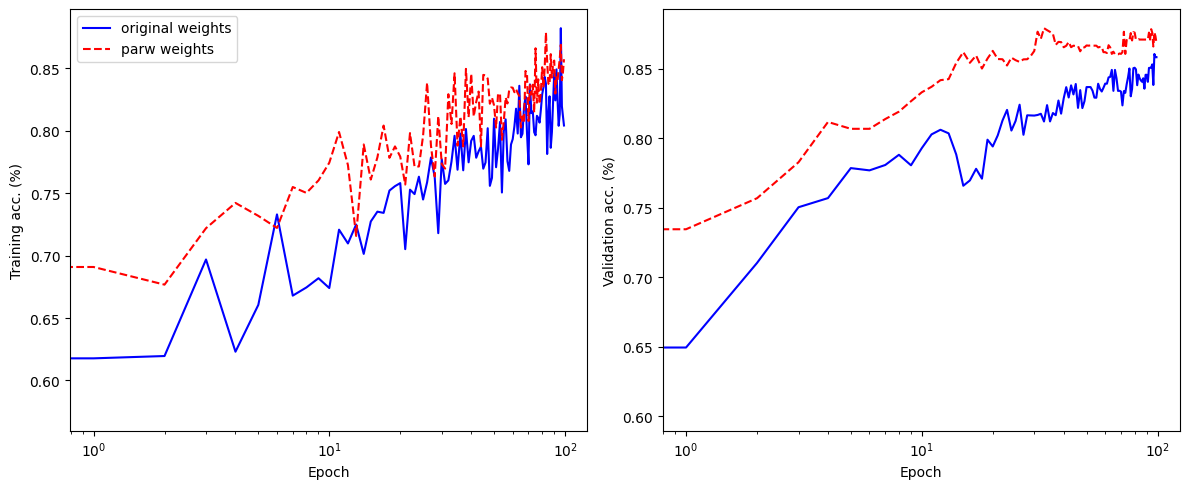

In [42]:
plt.figure(figsize=(12, 5))

# Primeiro gráfico: Acurácia de treino
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
plt.plot(acc_list_total, label='original weights', color='blue')
plt.plot(acc_list_total_parw, label='parw weights', color='red', linestyle='dashed')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xlabel("Epoch")
plt.ylabel("Training acc. (%)")
plt.legend()

# Segundo gráfico: Acurácia de validação
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
plt.plot(val_list_total, label='Validation Accuracy', color='blue')
plt.plot(val_list_total_parw, label='parw weights', color='red', linestyle='dashed')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xlabel("Epoch")
plt.ylabel("Validation acc. (%)")

# Mostrar os gráficos
plt.tight_layout()  # Ajusta o layout automaticamente

plt.savefig('mlp_ecg200.png', dpi=300)
plt.show()

In [43]:
print(f"Média de train_acc_normal_1: {train_acc_1_mean:.4f}, Desvio padrão: {train_acc_1_std:.4f}")
print(f"Média de val_acc_normal_1: {val_acc_1_mean:.4f}, Desvio padrão: {val_acc_1_std:.4f}")
print(f"Média de test_acc_normal: {test_acc_mean:.4f}, Desvio padrão: {test_acc_std:.4f}")
print("\n################\n")
print(f"Média de train_acc_1: {train_acc_1_pwd_mean:.4f}, Desvio padrão: {train_acc_1_pwd_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_pwd_mean:.4f}, Desvio padrão: {val_acc_1_pwd_std:.4f}")
print(f"Média de test_acc: {test_acc_pwd_mean:.4f}, Desvio padrão: {test_acc_pwd_std:.4f}")

Média de train_acc_normal_1: 0.5496, Desvio padrão: 0.0917
Média de val_acc_normal_1: 0.6154, Desvio padrão: 0.1410
Média de test_acc_normal: 0.8402, Desvio padrão: 0.0279

################

Média de train_acc_1: 0.5664, Desvio padrão: 0.0718
Média de val_acc_1: 0.6802, Desvio padrão: 0.0807
Média de test_acc: 0.8602, Desvio padrão: 0.0232
